In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


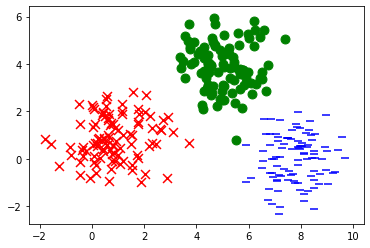

In [6]:
x1_label0 = np.random.normal(1,1,(100,1))
x2_label0 = np.random.normal(1,1,(100,1))
x1_label1 = np.random.normal(5,1,(100,1))
x2_label1 = np.random.normal(4,1,(100,1))
x1_label2 = np.random.normal(8,1,(100,1))
x2_label2 = np.random.normal(0,1,(100,1))

plt.scatter(x1_label0,x2_label0,c='r',marker='x',s=80)
plt.scatter(x1_label1,x2_label1,c='g',marker='o',s=80)
plt.scatter(x1_label2,x2_label2,c='b',marker='_',s=80)
plt.show()







In [25]:
xs_label0=np.hstack((x1_label0,x2_label0))
xs_label1=np.hstack((x1_label1,x2_label1))
xs_label2=np.hstack((x1_label2,x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))
labels=np.matrix([[1.,0.,0.]]*len(xs_label0)+[[0.,1.,0.]]*len(xs_label1)+[[0.,0.,1.]]*len(xs_label2))
arr=np.arange(xs.shape[0])
np.random.shuffle(arr)

xs=xs[arr,:]
labels=labels[arr,:]


[[ 8.29797219e+00  1.23350418e+00]
 [ 7.03426305e+00  1.02550841e+00]
 [ 6.86834929e-01  3.56494826e-01]
 [ 7.89689953e+00  1.98701392e+00]
 [ 8.01758625e-01  5.40333234e-01]
 [ 1.07448362e+00 -2.26319469e-01]
 [ 4.46220155e+00  4.38203028e+00]
 [ 7.11193767e+00 -1.33816984e+00]
 [ 9.27724261e-01  7.67201669e-01]
 [ 8.03380938e+00  6.78345421e-01]
 [ 8.33492584e+00  1.61277039e+00]
 [ 7.62293675e+00  8.34120516e-01]
 [ 2.73364426e+00  1.63690929e+00]
 [ 4.64995200e+00  4.94345899e+00]
 [ 4.72461332e+00  4.80432304e+00]
 [ 1.71972923e+00  1.64327289e-01]
 [ 7.64723590e+00  4.27047716e-01]
 [ 3.37319853e-02  2.18611608e+00]
 [ 7.83876721e+00  1.32974005e+00]
 [ 5.50634181e+00  7.99375294e-01]
 [ 3.56898834e+00  5.17028500e+00]
 [ 4.35792824e+00  3.39402475e+00]
 [ 7.95227504e+00 -1.29751003e+00]
 [ 4.47813220e+00  4.04144326e+00]
 [ 2.15854730e-01  6.55121127e-01]
 [ 6.44540173e+00  5.13367102e+00]
 [-3.46334489e-01  4.88867352e-01]
 [ 4.34370683e+00  3.71573933e+00]
 [ 4.89538895e+00  4

In [26]:
test_x1_label0 = np.random.normal(1,1,(10,1))
test_x2_label0 = np.random.normal(1,1,(10,1))
test_x1_label1 = np.random.normal(5,1,(10,1))
test_x2_label1 = np.random.normal(4,1,(10,1))
test_x1_label2 = np.random.normal(8,1,(10,1))
test_x2_label2 = np.random.normal(0,1,(10,1))

test_xs_label0=np.hstack((test_x1_label0,test_x2_label0))
test_xs_label1=np.hstack((test_x1_label1,test_x2_label1))
test_xs_label2=np.hstack((test_x1_label2,test_x2_label2))
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))

test_labels=np.matrix([[1.,0.,0.]]*len(test_xs_label0)+[[0.,1.,0.]]*len(test_xs_label1)+[[0.,0.,1.]]*len(test_xs_label2))

train_size,num_features=xs.shape
print(xs.shape)

(300, 2)


In [31]:
learning_rate=0.01
training_epoch=1000
num_labels=3
batch_size=100
X=tf.placeholder("float",shape=[None,num_features])
Y=tf.placeholder("float",shape=[None,num_labels])
W=tf.Variable(tf.zeros([num_features,num_labels]))
b=tf.Variable(tf.zeros([num_labels]))
y_model=tf.nn.softmax(tf.matmul(X,W)+b)

print(y_model)

cost=-tf.reduce_sum(Y*tf.log(y_model))
train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction=tf.equal(tf.argmax(y_model,1),tf.argmax(Y,1))

accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))


Tensor("Softmax_2:0", shape=(?, 3), dtype=float32)


In [32]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(training_epoch*train_size//batch_size):
        offset=(step*batch_size)%train_size
        batch_xs=xs[offset:(offset+batch_size),:]
        batch_labels=labels[offset:(offset+batch_size)]
        err,_=sess.run([cost,train_op],feed_dict={X:test_xs,Y:test_labels})
        #err,_=sess
            
    W_val=sess.run(W)
    print('w= ',W_val)
    b_val=sess.run(b)
    print("b",b_val)
    print("accuracy",accuracy.eval(feed_dict={X:test_xs,Y:test_labels}))

w=  [[-1.8496948   0.49078697  1.3589057 ]
 [ 0.3702479   2.1074517  -2.477701  ]]
b [ 6.5664864 -3.9291883 -2.6373127]
accuracy 1.0
